In [1]:
from pyteomics import mgf
import pandas as pd
import numpy as np
import glob as glob
import os
import matplotlib.pyplot as plt
import networkx as nx
import pingouin as pg
import seaborn as sns
sys.path.insert(0,'/global/homes/b/bpb/repos/metatlas')
from metatlas.io import feature_tools as ft

/global/common/software/m2650/msbuddy/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [13]:
# file = '/global/cfs/cdirs/metatlas/raw_data/egsb/20231113_EB_SMK_107002-011_CenturyExp_20230414_EXP120A_C18-EP_USDAY72349'
file = '/global/cfs/cdirs/metatlas/raw_data/egsb/20240125_EB_MdR_101544-059_WAVESTAB3_20231222_EXP120A_C18-EP_USDAY72349'
files = glob.glob(os.path.join(file,'*NEG*.h5'))
files = [f for f in files if not 'exctrl' in f.lower()]
files = [f for f in files if not 'qc' in f.lower()]
# files = [f for f in files if  'sunshine' in f.lower()]
# files = [f for f in files if ('water' in f) | ('MeOH' in f)]


files = pd.DataFrame(files,columns=['filename'])
# files = files[files['filename'].isin(files_to_use)]
files['experiment'] = files['filename'].apply(lambda x: '_'.join(x.split('/')[-1].split('_')[4:6]))
files['sampletype'] = files['filename'].apply(lambda x: x.split('/')[-1].split('_')[12])
# # files['sampletype'] = files['filename'].apply(lambda x: '_'.join(x.split('/')[-1].split('_')[12:15]))
# print(files['experiment'].unique())
# # experiments = ['Permafrost_pilot', 'SoilWetDry_final',
#        # 'GEODES_All3', 'FRCgw2_20230830','OMTSoil50g_Pilot']
# # files = files[files['experiment'].isin(experiments)]
files['sampletype'].unique()

files
# files

filename          experiment  \
0   /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
1   /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
2   /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
3   /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
4   /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
5   /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
6   /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
7   /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
8   /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
9   /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
10  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
11  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
12  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
13  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
14  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
15  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
16  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
17  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
18  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
19  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
20  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
21  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
22  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
23  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
24  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
25  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
26  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
27  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
28  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
29  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
30  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
31  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
32  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
33  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
34  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
35  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
36  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
37  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
38  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
39  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
40  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
41  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
42  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   
43  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...  WAVESTAB3_20231222   

                             sampletype  
0    supern-CentExp-OMT1d2-NatCom-d7-Lo  
1    supern-CentExp-OMT1d2-NatCom-d0-NA  
2   supern-CentExp-OMT1d2-Sterile-d0-NA  
3                custom-H2O-NA-NA-NA-NA  
4   supern-CentExp-OMT1d2-Sterile-d0-NA  
5   supern-CentExp-OMT1d2-Sterile-d0-Hi  
6                custom-H2O-NA-NA-NA-NA  
7    supern-CentExp-OMT1d2-NatCom-d7-Hi  
8    supern-CentExp-OMT1d2-NatCom-d7-NA  
9    supern-CentExp-OMT1d2-NatCom-d0-Hi  
10  supern-CentExp-OMT1d2-Sterile-d7-NA  
11   supern-CentExp-OMT1d2-NatCom-d7-NA  
12   supern-CentExp-OMT1d2-NatCom

In [ ]:
df = pd.read_csv('../data/public_and_internal_files_with_massive_and_redu.tsv', sep='\t')
df = df[~df['buddy'].str.contains('qc',case=False)]
df = df[~df['buddy'].str.contains('blank',case=False)]
# df['keywords'] = df['keywords'].apply(lambda x: x.split('###') if type(x)==str else [])
# df['keyword_DOM'] = df['keywords'].apply(lambda x: True if (('dom' in x) | ('organic matter' in x) | ('soil' in x)) else False)
idx1 = (df['in_massive_dom_list'])# | df['keyword_DOM']
# idx2 = df['data_dir']=='/global/cfs/cdirs/metatlas/projects/massive_data_for_scn'
idx3 = df['data_dir']=='/global/cfs/cdirs/metatlas/projects/rawdata_for_scn'
# df = df[(idx3)]# | (idx1)] #  | (idx2)
df = df[(idx3) | (idx1)] #  | (idx2)
# df = df[df['SampleType']=='plant']
out_dir = '/global/cfs/cdirs/metatlas/projects/carbon_network/raw_data'
temp_files = df['h5'].tolist()
files = []
for f in temp_files:
    base_dir = os.path.dirname(f)
    base_name = os.path.basename(f)
    new_dir = os.path.join(out_dir,base_dir)
    new_name = os.path.join(new_dir,base_name)
    files.append(new_name)
    if not os.path.isfile(new_name):
        print('File Not Found!')
        print(new_name)
        print(f)


files = pd.DataFrame(files,columns=['filename'])
# files = files[files['filename'].isin(files_to_use)]
files = files[files['filename'].str.contains('global/cfs/cdirs/metatlas/projects/rawdata_for_scn')]
files['experiment'] = files['filename'].apply(lambda x: '_'.join(x.split('/')[-1].split('_')[4:6]))
files['sampletype'] = files['filename'].apply(lambda x: x.split('/')[-1].split('_')[12])
# # files['sampletype'] = files['filename'].apply(lambda x: '_'.join(x.split('/')[-1].split('_')[12:15]))
# print(files['experiment'].unique())
# # experiments = ['Permafrost_pilot', 'SoilWetDry_final',
#        # 'GEODES_All3', 'FRCgw2_20230830','OMTSoil50g_Pilot']
# # files = files[files['experiment'].isin(experiments)]
files['sampletype'].unique()

files
# files

In [ ]:
from matplotlib.ticker import ScalarFormatter
f = files.loc[files['sampletype']=='Mesocosm-fluct-T0','filename'].values[0]
data = pd.read_hdf(f,key='ms1_neg')
t = 3
m = 311.1136
# data = data[abs(data['mz']-m)<0.01]
data = data[abs(data['rt']-t)<0.1]
data = data[data['i']<2e6]
fig,ax = plt.subplots(figsize=(10,5))
# data.sort_values('rt',inplace=True)
# ax.plot(data['rt'],data['i'])
ax.vlines(data['mz'],0,data['i'],color='k')
ax.set_ylim(0,2e6)
ax.set_xlim(311.11,311.15)
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=False))

plt.show()

In [14]:
# G = nx.read_graphml('../data/structural_clusters_network.graphml')
# G = nx.read_graphml('../data/network.graphml')
G = nx.read_graphml('/global/homes/b/bpb/repos/scndb/build/CarbonNetwork.graphml')
df = dict(G.nodes(data=True))
df = pd.DataFrame(df).T
df.index.name = 'node_id'
df.reset_index(inplace=True,drop=False)
df.head()
df.columns

Index(['node_id', 'original_index', 'massive_id', 'no_extension_basename',
       'precursor_mz', 'isolated_precursor_mz', 'rt',
       'coisolated_precursor_count', 'predicted_formula', 'estimated_fdr',
       'predicted_mass', 'mass_error', 'num_mdm_frags', 'max_score_identity',
       'best_match_method_identity', 'max_matches_identity', 'name_identity',
       'inchi_key_identity', 'smiles_identity', 'formula_identity',
       'precursor_mz_identity', 'original_p2d2_index_identity',
       'isin_fticr_formula', 'class_results', 'superclass_results',
       'pathway_results', 'isglycoside', 'title', 'description'],
      dtype='object')

In [15]:
sum(pd.notna(df['inchi_key_identity'])),sum(pd.notna(df['pathway_results'])),df.shape[0]

(1402, 5833, 11520)

In [16]:

ppm_tolerance = 10
mz_tol = 0.002
rt_min = 1
rt_max = 10

atlas = df[['node_id','precursor_mz']].copy()
atlas.rename(columns={'precursor_mz':'mz','node_id':'label'},inplace=True)
atlas['rt_min'] = rt_min
atlas['rt_max'] = rt_max
atlas['mz_tolerance'] = mz_tol
atlas['rt_tolerance'] = 100
atlas['ppm_tolerance'] = ppm_tolerance
atlas['extra_time'] = 0
atlas['rt_peak'] = (rt_min+rt_max)/2  
atlas['group_index'] = ft.group_consecutive(atlas['mz'].values[:],
                                    stepsize=ppm_tolerance,
                                    do_ppm=True)



In [17]:

out = []
counter = 0
# files = files.sample(10)
for f in files['filename']:
    try:
        d = ft.get_atlas_data_from_file(f,atlas,desired_key='ms1_neg')
    except:
        print('Can not read',f)
        continue
    d = d[d['in_feature']==True].groupby('label').apply(ft.calculate_ms1_summary).reset_index()
    d['filename'] = f
    out.append(d)
    counter += 1
    print(counter)
out = pd.concat(out)
out.rename(columns={'label':'node_id'},inplace=True)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44


In [18]:
out['experiment'] = out['filename'].apply(lambda x: '_'.join(x.split('/')[-1].split('_')[4:6]))
out['sampletype'] = out['filename'].apply(lambda x: x.split('/')[-1].split('_')[12])
# out['depth'] = out['filename'].apply(lambda x: x.split('/')[-1].split('_')[12].split('-')[-1])
# out['environment'] = out['filename'].apply(lambda x: x.split('/')[-1].split('_')[12].split('-')[1])
out
# out['sampletype1'] = out['filename'].apply(lambda x: '-'.join(x.split('/')[-1].split('_')[12].split('-')[1:]))
# # out['sampletype2'] = out['filename'].apply(lambda x: x.split('/')[-1].split('_')[14].split('-')[3])
# g = out.groupby('filename')['peak_area'].median()
# g.sort_values(ascending=False,inplace=True)
# g.head(20).to_csv('ones_that_are_big.csv')

node_id  num_datapoints     peak_area   peak_height  mz_centroid  \
0         0.0           256.0  6.572925e+07  1.220651e+06   200.128905   
1         1.0          1881.0  1.034086e+09  5.473598e+06   163.039745   
2        10.0          1600.0  4.964989e+08  6.353160e+06   165.018891   
3       100.0          1535.0  6.382031e+08  4.454307e+06   153.019064   
4     10001.0           615.0  1.188087e+08  1.017849e+06   209.056255   
...       ...             ...           ...           ...          ...   
8903   9988.0           143.0  8.908293e+06  1.706000e+05   497.167065   
8904    999.0          1186.0  6.173115e+07  1.479939e+05   163.039811   
8905   9993.0             2.0  2.208645e+04  1.132690e+04   469.339099   
8906   9994.0             1.0  1.171643e+04  1.171643e+04   449.121822   
8907   9997.0             2.0  2.787057e+04  1.853294e+04   573.234987   

       rt_peak                                           filename  \
0     3.756429  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...   
1     3.307318  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...   
2     2.548210  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...   
3     2.529592  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...   
4     2.708814  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...   
...        ...                                                ...   
8903  5.471064  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...   
8904  4.669055  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...   
8905  9.528958  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...   
8906  5.272316  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...   
8907  5.390484  /global/cfs/cdirs/metatlas/raw_data/egsb/20240...   

              experiment                          sampletype  
0     WAVESTAB3_20231222  supern-CentExp-OMT1d2-NatCom-d7-Lo  
1     WAVESTAB3_20231222  supern-CentExp-OMT1d2-NatCom-d7-Lo  
2     WAVESTAB3_20231222  supern-CentExp-OMT1d2-NatCom-d7-Lo  
3     WAVESTAB3_20231222  supern-CentExp-OMT1d2-NatCom-d7-Lo  
4     WAVESTAB3_20231222  supern-CentExp-OMT1d2-NatCom-d7-Lo  
...                  ...                                 ...  
8903  WAVESTAB3_20231222              custom-H2O-NA-NA-NA-NA  
8904  WAVESTAB3_20231222              custom-H2O-NA-NA-NA-NA  
8905  WAVESTAB3_20231222              custom-H2O-NA-NA-NA-NA  
8906  WAVESTAB3_20231222              custom-H2O-NA-NA-NA-NA  
8907  WAVESTAB3_20231222              custom-H2O-NA-NA-NA-NA  

[450112 rows x 9 columns]

In [19]:
# out.to_pickle('/global/cfs/cdirs/metatlas/projects/carbon_network/temp_data/all_berkeley_lab_data.pkl')
# out.to_pickle('/global/cfs/cdirs/metatlas/projects/carbon_network/temp_data/century_experiment_data.pkl')
out.to_pickle('/global/cfs/cdirs/metatlas/projects/carbon_network/temp_data/wavestab3_data.pkl')

In [73]:
# out = pd.read_pickle('/global/cfs/cdirs/metatlas/projects/carbon_network/temp_data/all_berkeley_lab_data.pkl')
# out = pd.read_pickle('/global/cfs/cdirs/metatlas/projects/carbon_network/temp_data/wavestab3_data.pkl')
out = pd.read_pickle('/global/cfs/cdirs/metatlas/projects/carbon_network/temp_data/century_experiment_data.pkl')

In [75]:
# out = out[out['sampletype'].str.contains('00')]
out = out[out['sampletype'].str.contains('40to')]
out['sampletype'] = out['sampletype'].apply(lambda x: x.split('-')[1])
out['sampletype'].unique()

array(['RWC', 'GRASS', 'CMT', 'UNBDP', 'OMT'], dtype=object)

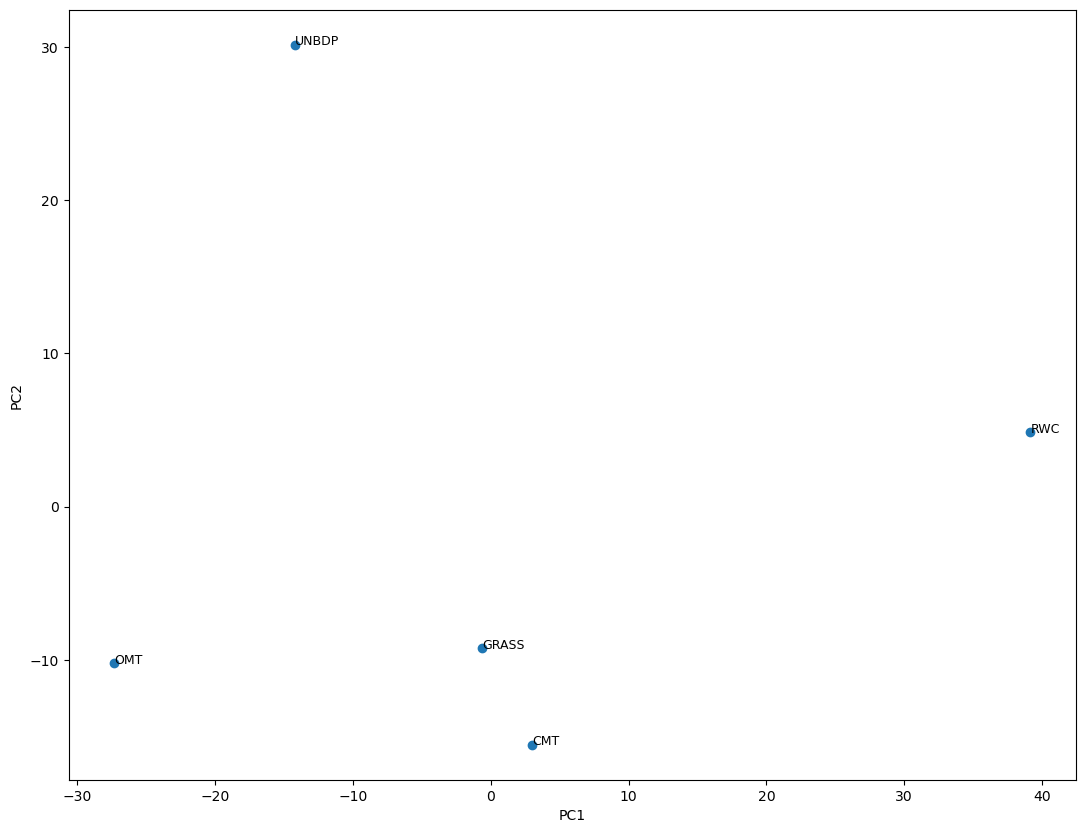

In [76]:
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from adjustText import adjust_text

node_data = pd.pivot_table(out,index=['node_id'],columns=['sampletype'],values='peak_area',aggfunc=np.mean,fill_value=300)
# Select the columns to normalize
# columns_to_normalize = node_data.columns

# Normalize the selected columns
# node_data[columns_to_normalize] = normalize(node_data[columns_to_normalize], norm='l2', axis=1)
node_data = node_data.apply(lambda x: np.log10(x))
# node_data = node_data.apply(lambda x: x**0.5)


import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(13,10))
# Perform PCA on each column of node_data
pca = PCA(n_components=2)
node_data_pca = pca.fit_transform(node_data.T)

ax.scatter(node_data_pca[:, 0], node_data_pca[:, 1])

# Create a list to hold the text objects
texts = []
for i, txt in enumerate(node_data.columns):
    if txt=='SRFA3-MeOH-fil-NA-NA':
        texts.append(ax.text(node_data_pca[i, 0], node_data_pca[i, 1], txt, fontsize=12,color='red'))
    elif txt=='55M-Subsection-MeOH':
        texts.append(ax.text(node_data_pca[i, 0], node_data_pca[i, 1], txt, fontsize=12,color='red'))
    elif txt=='GEO-TB-8-F':
        texts.append(ax.text(node_data_pca[i, 0], node_data_pca[i, 1], txt, fontsize=12,color='red'))
    elif txt=='CORN-21-ABG-SD-01FS-410-1':
        texts.append(ax.text(node_data_pca[i, 0], node_data_pca[i, 1], txt, fontsize=12,color='red'))
    elif txt=='Mesocosm-fluct-T0':
        texts.append(ax.text(node_data_pca[i, 0], node_data_pca[i, 1], txt, fontsize=12,color='red'))
    else:
        texts.append(ax.text(node_data_pca[i, 0], node_data_pca[i, 1], txt, fontsize=9))

# Adjust the position of the text to minimize overlaps
# adjust_text(texts)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# Show the plot
plt.show()


In [23]:
node_data.columns

Index(['custom-H2O-NA-NA-NA-NA', 'supern-CentExp-OMT1d2-NatCom-d0-Hi',
       'supern-CentExp-OMT1d2-NatCom-d0-Lo',
       'supern-CentExp-OMT1d2-NatCom-d0-NA',
       'supern-CentExp-OMT1d2-NatCom-d7-Hi',
       'supern-CentExp-OMT1d2-NatCom-d7-Lo',
       'supern-CentExp-OMT1d2-NatCom-d7-NA',
       'supern-CentExp-OMT1d2-Sterile-d0-Hi',
       'supern-CentExp-OMT1d2-Sterile-d0-NA',
       'supern-CentExp-OMT1d2-Sterile-d7-Hi',
       'supern-CentExp-OMT1d2-Sterile-d7-NA'],
      dtype='object', name='sampletype')

In [ ]:
keep_samples = ['SRFA3-MeOH-fil-NA-NA','55M-Subsection-MeOH','GEO-TB-8-F','CORN-21-ABG-SD-01FS-410-1','Mesocosm-fluct-T0']
keep_samples = ['soil-OMT-1d2-00to20cm','soil-CMT-1d4-00to20cm']
keep_samples = ['supern-CentExp-OMT1d2-NatCom-d0-Hi', 'supern-CentExp-OMT1d2-NatCom-d7-Hi']

0.019822896806201307


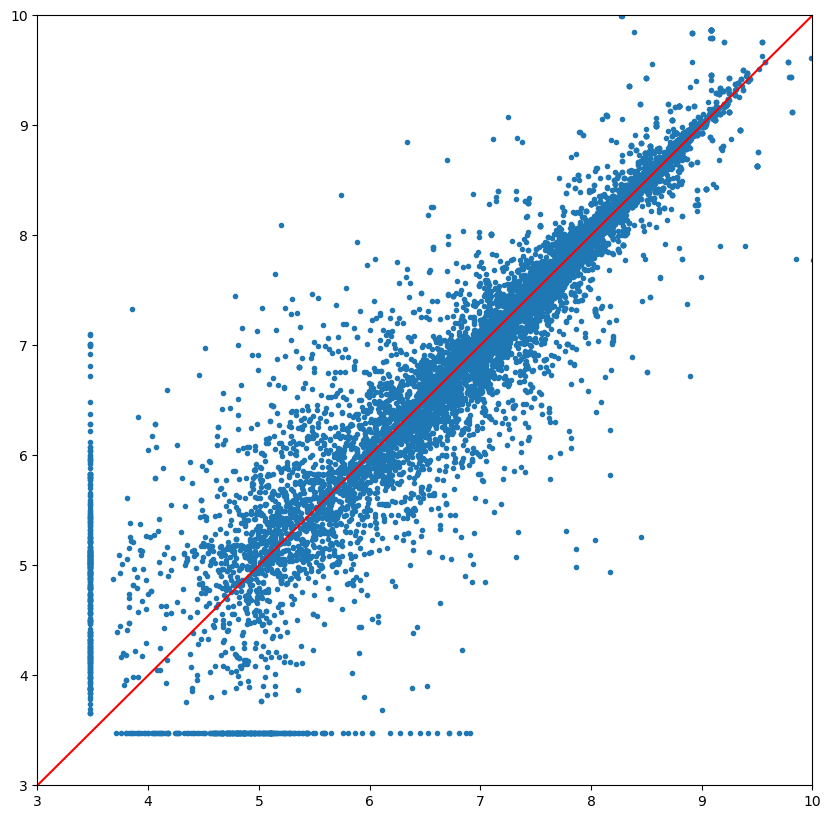

In [24]:
# keep_samples = ['SRFA3-MeOH-fil-NA-NA','55M-Subsection-MeOH','GEO-TB-8-F','CORN-21-ABG-SD-01FS-410-1','Mesocosm-fluct-T0']
# keep_samples = ['55M-Subsection-MeOH','Mesocosm-fluct-T0']
# keep_samples = ['supern-WAVE-NatCom-NLDM-Day7', 'supern-WAVE-NatCom-NLDM-Day0']
# keep_samples = ['soil-OMT-1d2-00to20cm','soil-CMT-1d4-00to20cm']
# keep_samples = ['supern-CentExp-OMT1d2-NatCom-d0-Hi', 'supern-CentExp-OMT1d2-NatCom-d7-Hi']
# keep_samples = ['55M-Subsection-MeOH','Mesocosm-fluct-T0']
s1 = keep_samples[0]
s2 = keep_samples[1]
min_value = 3000
node_data = pd.pivot_table(out[out['sampletype'].isin(keep_samples)],index=['node_id'],columns=['sampletype'],values='peak_area',aggfunc=np.mean,fill_value=min_value)
node_data = node_data.apply(lambda x: np.log10(x))
idx1 = node_data[s1]>np.log10(min_value)
idx2 = node_data[s2]>np.log10(min_value)
idx =  (idx1) & (idx2)
m = np.median(node_data.loc[idx,s1] - node_data.loc[idx,s2])
print(m)
node_data.loc[idx1,s1] = node_data.loc[idx1,s1] - m
fig,ax = plt.subplots(figsize=(10,10))
# ax.hist(node_data[s1] - node_data[s2],bins=100)
# plt.show()
ax.plot(node_data[s1],node_data[s2],'.')
ax.set_xlim(3,10)
ax.set_ylim(3,10)
ax.plot([3,10],[3,10],'r-')
node_data['fold_change'] = node_data[s1] - node_data[s2]

# node_data.columns = ['Quant: %s'%c for c in node_data.columns]
# node_data = node_data[cols]
# # Select the columns to normalize
# columns_to_normalize = node_data.columns

# # Normalize the selected columns
# node_data[columns_to_normalize] = normalize(node_data[columns_to_normalize], norm='l2', axis=1)

backup_G = G.copy()
nx.set_node_attributes(backup_G, node_data.to_dict('index'))
nx.write_graphml(backup_G,'../data/network_experiment_level_intensity_wavestab3.graphml')
backup_G_mst = nx.maximum_spanning_tree(backup_G)
nx.write_graphml(backup_G_mst,'../data/network_experiment_level_intensity_mst_wavestab3.graphml')

In [94]:
original_index = nx.get_node_attributes(G, 'original_index')
np_classifier_pathway = nx.get_node_attributes(G, 'pathway_results')
np_classifier_class = nx.get_node_attributes(G, 'class_results')
smiles_identity = nx.get_node_attributes(G, 'smiles_identity')
# structural_cluster_subclassname  = nx.get_node_attributes(G, 'structural_cluster_subclassname')
# structural_cluster_subclassname

{}

In [92]:
# node_data = pd.pivot_table(out,index=['node_id'],columns=['experiment'],values='peak_area',aggfunc=np.mean,fill_value=300)
node_data = pd.pivot_table(out,index=['node_id'],columns=['sampletype'],values='peak_area',aggfunc=np.mean,fill_value=300)
# node_data = pd.pivot_table(out[out['sampletype'].str.contains('Hi')],index=['node_id'],columns=['experiment','sampletype'],values='peak_area',aggfunc=np.mean,fill_value=300)
# node_data.columns = ['%s-%s'%(c[1],c[0]) for c in node_data.columns]

# node_data = node_data.apply(lambda  x: np.log10(x+1),axis=1)
# s = node_data.sum(axis=0).values
# m = s.mean()
# node_data.values[:,:] = m * (node_data.values[:,:]/s)
# node_data.columns = [c.split('/')[-1].split('_')[12] for c in node_data.columns]

# node_data.to_csv('../data/log10_averages_treatments.csv')
node_data.columns = ['Quant: %s'%c for c in node_data.columns]

n = node_data.copy()
m = n.min(axis=1)
m = n.values - m.values[:,None]
n = pd.DataFrame(m,index=n.index,columns=n.columns)

m = n.max(axis=1)
m = n.values / m.values[:,None]
n = pd.DataFrame(m,index=n.index,columns=n.columns)


original_index = nx.get_node_attributes(G, 'original_index')
np_classifier_pathway = nx.get_node_attributes(G, 'pathway_results')
np_classifier_class = nx.get_node_attributes(G, 'class_results')
smiles_identity = nx.get_node_attributes(G, 'smiles_identity')
# temp = {}
# for c in n.columns:
    # temp[c] = nx.get_node_attributes(backup_G, c)

temp = pd.merge(n,pd.DataFrame({'np_classifier_pathway':np_classifier_pathway}),left_index=True,right_index=True)
temp = pd.merge(temp,pd.DataFrame({'np_classifier_class':np_classifier_class}),left_index=True,right_index=True)
temp = pd.merge(temp,pd.DataFrame({'smiles_identity':smiles_identity}),left_index=True,right_index=True)
cols = [c for c in temp.columns if 'Quant' in c]

# cluster_df = temp.groupby(['np_classifier_pathway'])[cols].mean()
cluster_df = temp.groupby(['np_classifier_class','np_classifier_pathway'])[cols].mean()
identity_df = temp.groupby(['np_classifier_pathway','np_classifier_class','smiles_identity'])[cols].mean()
cluster_df

Quant: CMT  \
np_classifier_class                 np_classifier_pathway                         
12-oxophytodienoic acid metabolites Fatty acids                        0.389480   
2-pyrone derivatives                Terpenoids                         0.195336   
3-Decalinoyltetramic acids          Polyketides                        0.254542   
3-Spirotetramic acids               Polyketides                        1.000000   
4-pyrone derivatives                Polyketides                        0.291469   
...                                                                         ...   
Valerenane sesquiterpenoids         Terpenoids                         0.148651   
Wax monoesters                      Fatty acids                        0.042246   
Zearalenones                        Polyketides                        0.100524   
p-Terphenyls                        Shikimates and Phenylpropanoids    0.326003   
pteridine alkaloids                 Alkaloids                          0.652522   

                                                                     Quant: GRASS  \
np_classifier_class                 np_classifier_pathway                           
12-oxophytodienoic acid metabolites Fatty acids                          0.554459   
2-pyrone derivatives                Terpenoids                           0.310715   
3-Decalinoyltetramic acids          Polyketides                          0.737250   
3-Spirotetramic acids               Polyketides                          0.659027   
4-pyrone derivatives                Polyketides                          0.481231   
...                                                                           ...   
Valerenane sesquiterpenoids         Terpenoids                           0.000000   
Wax monoesters                      Fatty acids                          0.102546   
Zearalenones                        Polyketides                          0.261885   
p-Terphenyls                        Shikimates and Phenylpropanoids      0.313747   
pteridine alkaloids                 Alkaloids                            0.443562   

                                                                     Quant: OMT  \
np_classifier_class                 np_classifier_pathway                         
12-oxophytodienoic acid metabolites Fatty acids                        0.252176   
2-pyrone derivatives                Terpenoids                         0.666667   
3-Decalinoyltetramic acids          Polyketides                        0.779676   
3-Spirotetramic acids               Polyketides                        0.740086   
4-pyrone derivatives                Polyketides                        0.068753   
...                                                                         ...   
Valerenane sesquiterpenoids         Terpenoids                         0.360119   
Wax monoesters                      Fatty acids                        0.547790   
Zearalenones                        Polyketides                        0.765248   
p-Terphenyls                        Shikimates and Phenylpropanoids    0.373504   
pteridine alkaloids                 Alkaloids                          0.832635   

                                                                     Quant: RWC  \
np_classifier_class                 np_classifier_pathway                         
12-oxophytodienoic acid metabolites Fatty acids                        0.849886   
2-pyrone derivatives                Terpenoids                         0.338223   
3-Decalinoyltetramic acids          Polyketides                        0.000000   
3-Spirotetramic acids               Polyketides                        0.405084   
4-pyrone derivatives                Polyketides                        0.639926   
...                                                                         ...   
Valerenane sesquiterpenoids         Terpenoids                         1.000000   
Wax monoesters                      Fatty acids         

In [93]:
temp.sort_values('np_classifier_pathway').head(40)

Quant: CMT  Quant: GRASS  Quant: OMT  Quant: RWC  Quant: UNBDP  \
1216.0    0.364624      0.392570    0.309942    0.000000      1.000000   
166.0     0.364624      0.392570    0.309942    0.000000      1.000000   
1488.0    0.612809      0.081158    1.000000    0.000000      0.249897   
1288.0    0.218365      0.303920    0.592888    0.000000      1.000000   
1170.0    1.000000      0.000000    0.086886    0.015298      0.352873   
1171.0    0.287749      0.000000    0.653926    0.128100      1.000000   
717.0     0.000000      0.076761    1.000000    0.923837      0.353498   
60.0      0.305043      0.216252    1.000000    0.000000      0.050539   
1424.0    0.834323      0.113125    1.000000    0.000000      0.567384   
1466.0    0.000000      0.381953    0.918255    0.066551      1.000000   
898.0     1.000000      0.018104    0.000000    0.081065      0.326430   
1038.0    0.278950      0.204444    1.000000    0.000000      0.601823   
59.0      0.981723      0.606781    0.817954    1.000000      0.000000   
1406.0    0.000000      0.083405    0.484097    1.000000      0.254848   
450.0     0.124993      0.000000    1.000000    0.052134      0.673346   
1042.0    0.160295      0.000000    1.000000    0.031984      0.778947   
74.0      0.163493      0.238559    0.147211    0.000000      1.000000   
1445.0    0.470204      0.601033    0.000000    1.000000      0.362642   
879.0     0.000000      0.226209    0.382956    0.095686      1.000000   
845.0     0.112002      0.261126    1.000000    0.000000      0.639005   
1475.0    0.041080      0.143328    0.286369    0.000000      1.000000   
1253.0    0.039099      0.147018    1.000000    0.000000      0.218074   
87.0      0.228436      0.141269    0.383046    0.000000      1.000000   
1449.0    0.000000      1.000000    0.674583    0.782676      0.727524   
153.0     0.141493      0.285664    1.000000    0.000000      0.650994   
288.0     0.000000      0.065255    0.956980    0.230824      1.000000   
137.0     1.000000      0.670872    0.665270    0.000000      0.525350   
53.0      0.347957      0.423247    0.307637    0.000000      1.000000   
990.0     0.424195      0.350944    0.576863    0.000000      1.000000   
99.0      0.725132      0.000000    0.967345    0.195773      1.000000   
987.0     0.390768      0.277515    0.509859    0.000000      1.000000   
348.0     0.228436      0.141269    0.383046    0.000000      1.000000   
505.0     0.498340      0.433637    0.784086    0.000000      1.000000   
1312.0    1.000000      0.000000    0.086886    0.015298      0.352873   
1453.0    0.552516      0.500353    0.494793    0.000000      1.000000   
972.0     0.166074      0.112361    0.540119    0.000000      1.000000   
132.0     0.000000      0.016632    0.250208    1.000000      0.124825   
238.0     0.256342      0.062494    0.000000    0.011136      1.000000   
853.0     0.000000      0.693609    0.131118    0.970287      1.000000   
116.0     0.498340      0.433637    0.784086    0.000000      1.000000   

       np_classifier_pathway              np_classifier_class  \
1216.0             Alkaloids               Pyridine alkaloids   
166.0              Alkaloids              Quinoline alkaloids   
1488.0             Alkaloids            Pyrrolidine alkaloids   
1288.0             Alkaloids               Pyridine alkaloids   
1170.0             Alkaloids              Quinoline alkaloids   
1171.0             Alkaloids                Phenylethylamines   
717.0              Alkaloids              Quinoline alkaloids   
60.0               Alkaloids              pteridine alkaloids   
1424.0             Alkaloids               Pyridine alkaloids   
1466.0             Alkaloids              Phenazine alkaloids   
898.0              Alkaloids  Phenylalanine-derived alkaloids   
1038.0             Alkaloids          Simple indole alkaloids   
59.0               Alkaloids          Simple indole alkaloids   
1406.0             Alkaloids               Pyridine alkaloids  

Quant: CMT  \
np_classifier_class             np_classifier_pathway                         
Irregular monoterpenoids        Terpenoids                         1.000000   
Phenylalanine-derived alkaloids Alkaloids                          1.000000   
Estrane steroids                Terpenoids                         0.957994   
Paraconic acids and derivatives Fatty acids                        0.728485   
Heterocyclic fatty acids        Fatty acids                        1.000000   
...                                                                     ...   
Naphthoquinones                 Polyketides                        0.267854   
p-Terphenyls                    Shikimates and Phenylpropanoids    0.326003   
Epoxyeicosatrienoic acids       Fatty acids                        0.044441   
Androstane steroids             Terpenoids                         0.353403   
Phytofurans                     Fatty acids                        0.613956   

                                                                 Quant: GRASS  \
np_classifier_class             np_classifier_pathway                           
Irregular monoterpenoids        Terpenoids                           0.429183   
Phenylalanine-derived alkaloids Alkaloids                            0.018104   
Estrane steroids                Terpenoids                           0.167382   
Paraconic acids and derivatives Fatty acids                          0.246221   
Heterocyclic fatty acids        Fatty acids                          0.000000   
...                                                                       ...   
Naphthoquinones                 Polyketides                          0.332539   
p-Terphenyls                    Shikimates and Phenylpropanoids      0.313747   
Epoxyeicosatrienoic acids       Fatty acids                          1.000000   
Androstane steroids             Terpenoids                           0.994003   
Phytofurans                     Fatty acids                          0.725890   

                                                                 Quant: OMT  \
np_classifier_class             np_classifier_pathway                         
Irregular monoterpenoids        Terpenoids                         0.000000   
Phenylalanine-derived alkaloids Alkaloids                          0.000000   
Estrane steroids                Terpenoids                         0.063916   
Paraconic acids and derivatives Fatty acids                        0.371959   
Heterocyclic fatty acids        Fatty acids                        0.387783   
...                                                                     ...   
Naphthoquinones                 Polyketides                        0.485901   
p-Terphenyls                    Shikimates and Phenylpropanoids    0.373504   
Epoxyeicosatrienoic acids       Fatty acids                        0.000000   
Androstane steroids             Terpenoids                         0.000000   
Phytofurans                     Fatty acids                        0.000000   

                                                                 Quant: RWC  \
np_classifier_class             np_classifier_pathway                         
Irregular monoterpenoids        Terpenoids                         0.160146   
Phenylalanine-derived alkaloids Alkaloids                          0.081065   
Estrane steroids                Terpenoids                         0.564826   
Paraconic acids and derivatives Fatty acids                        0.508484   
Heterocyclic fatty acids        Fatty acids                        0.342752   
...                                                                     ...   
Naphthoquinones                 Polyketides                        0.666667   
p-Terphenyls                    Shikimates and Phenylpropanoids    0.666667   
Epoxyeicosatrienoic acids       Fatty acids                        0.546148   
Androstane steroids             Terpenoids                         1.000000   
Phytofu

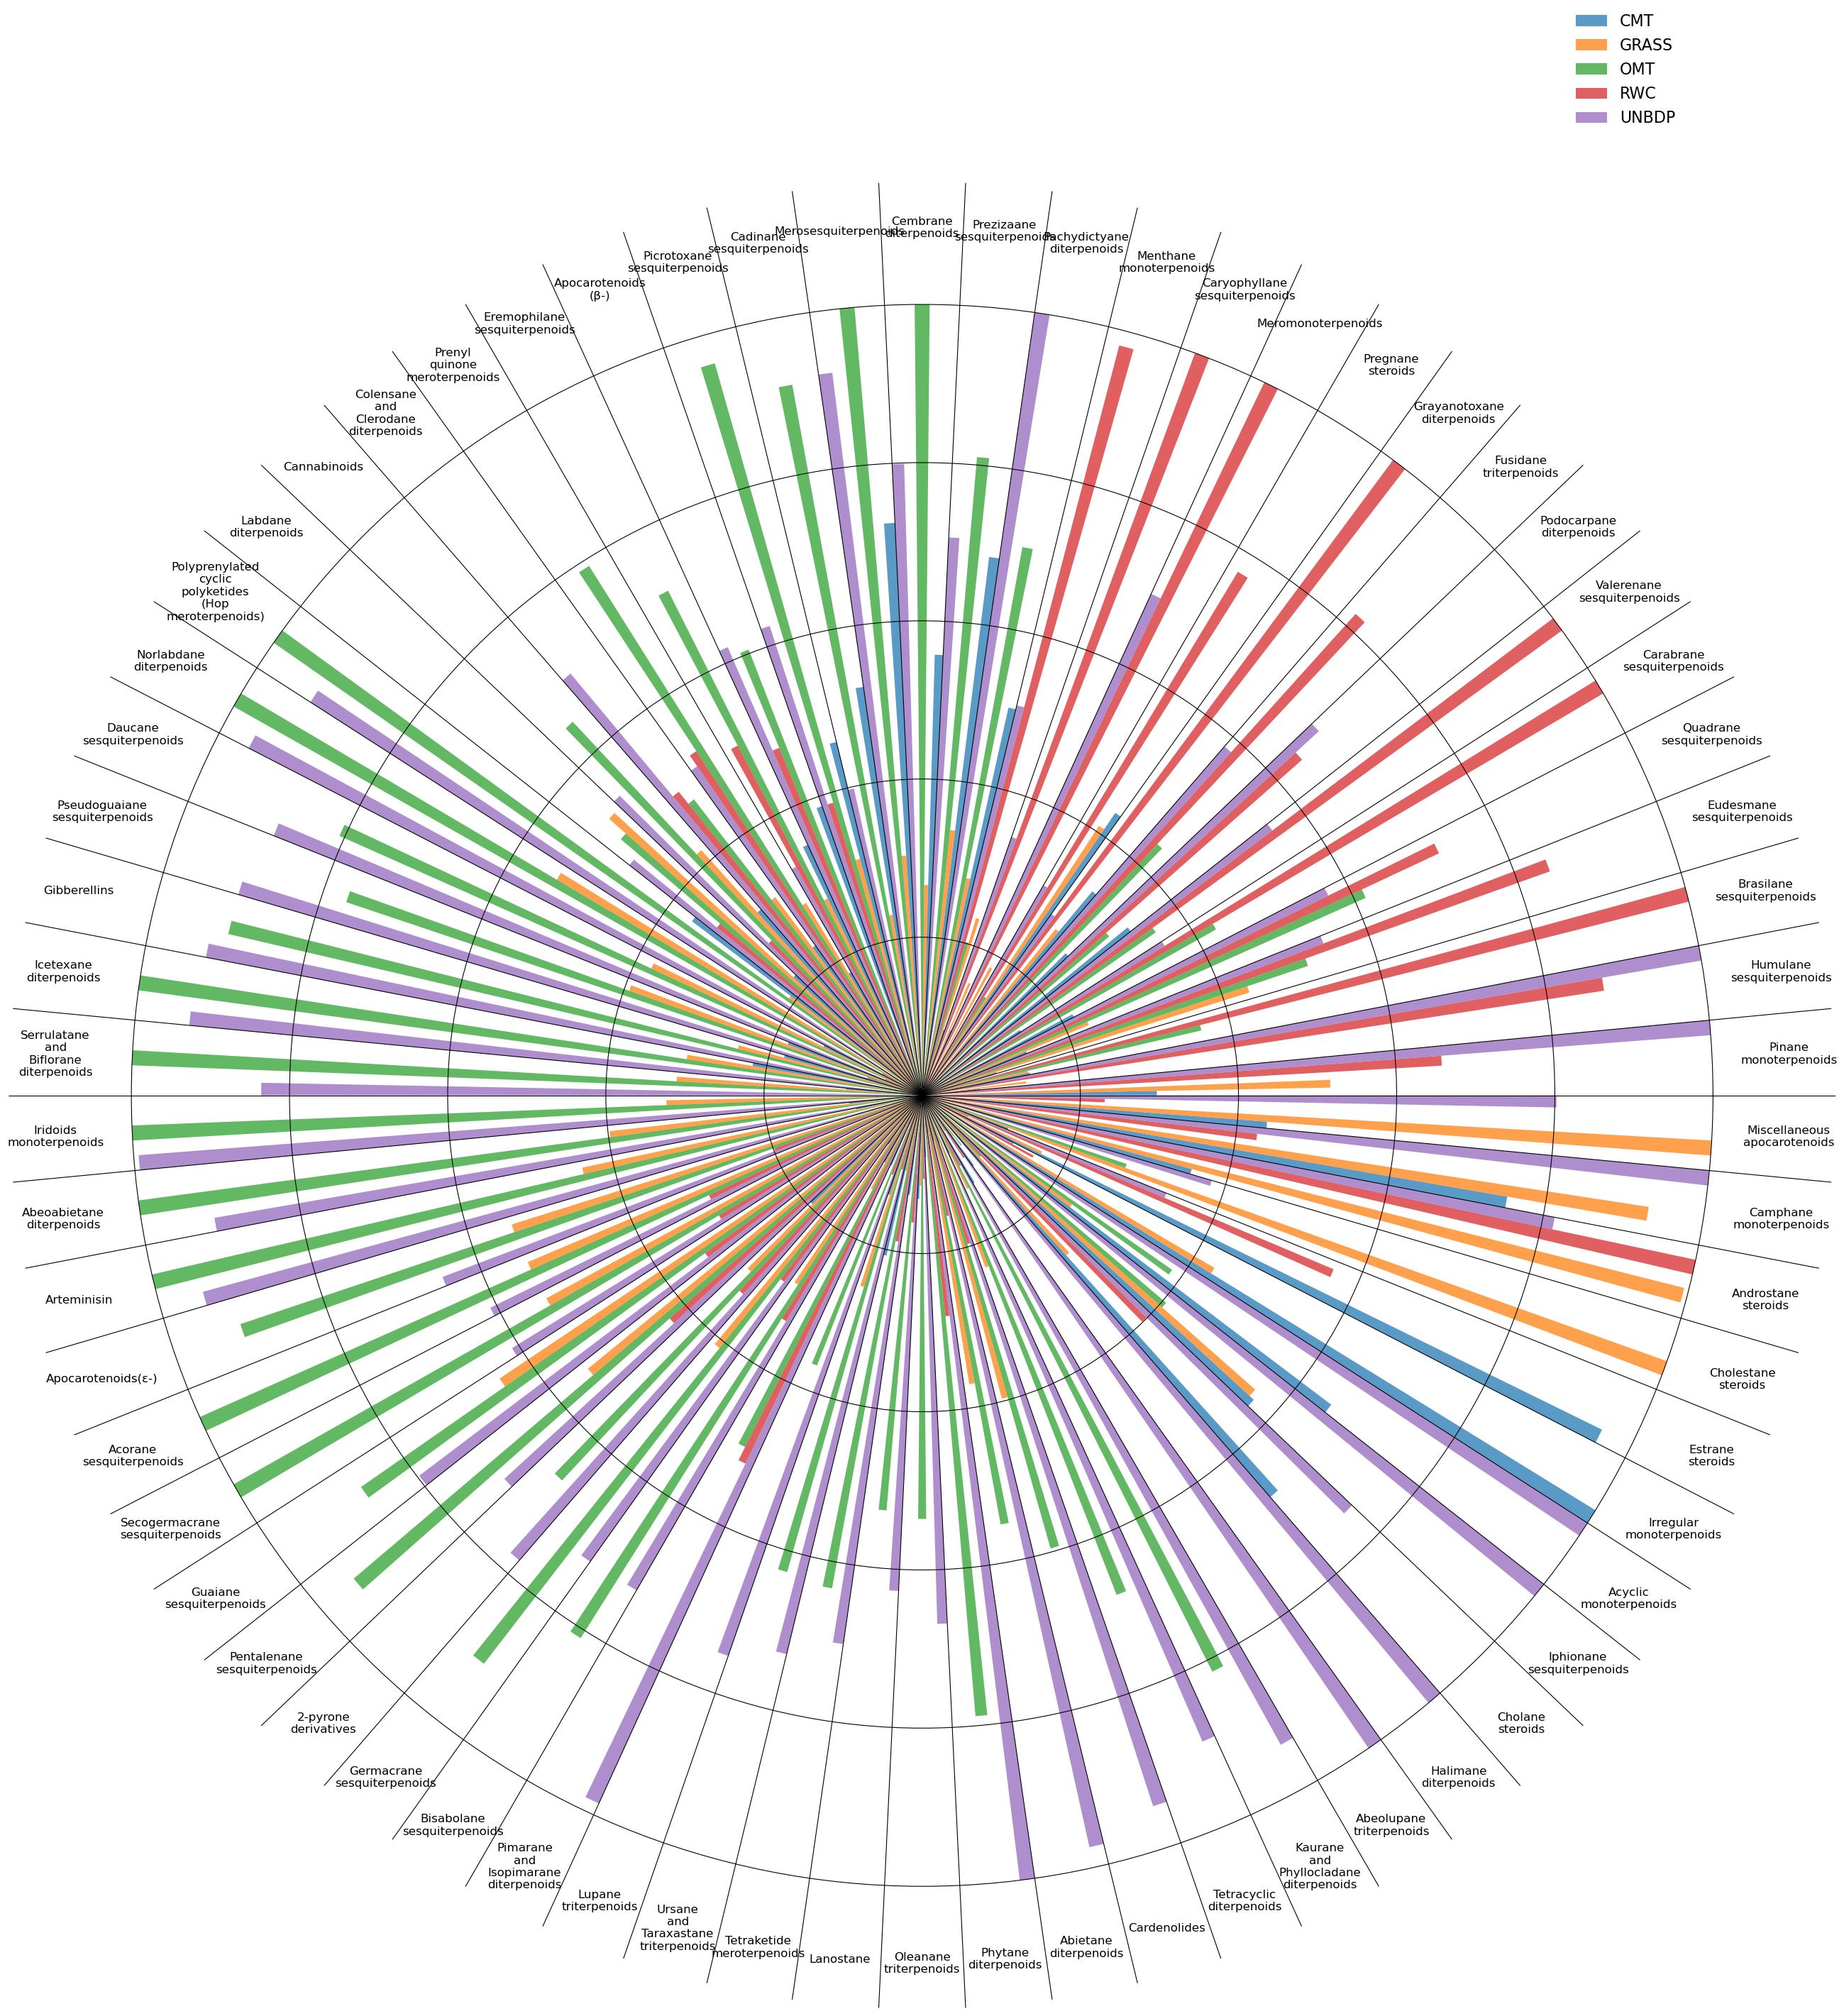

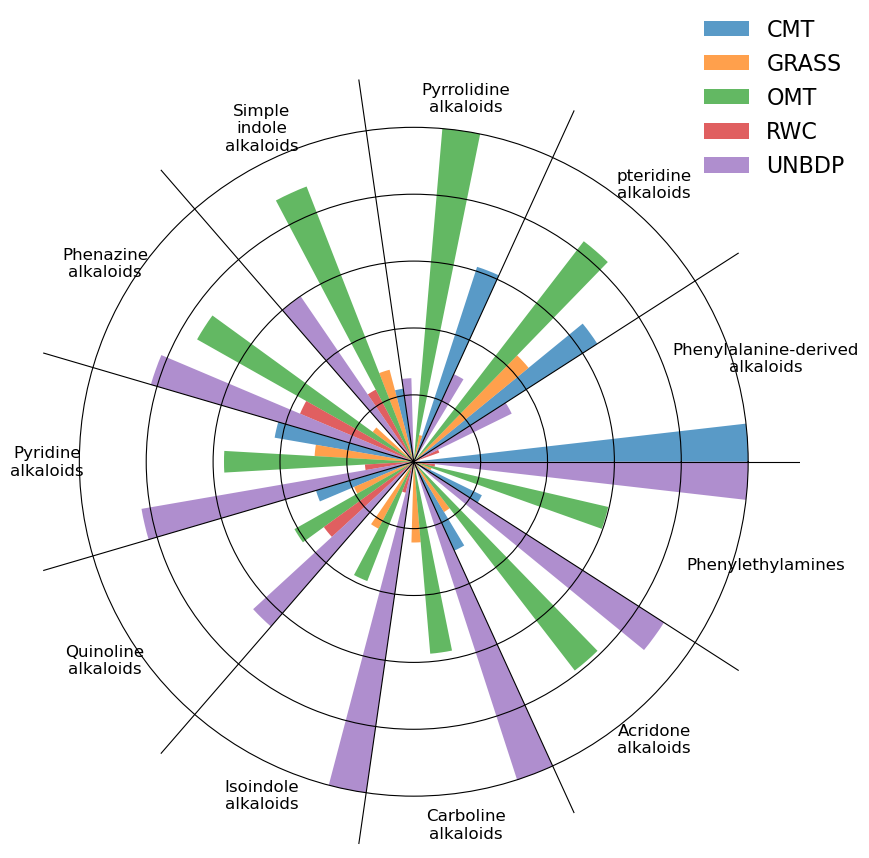

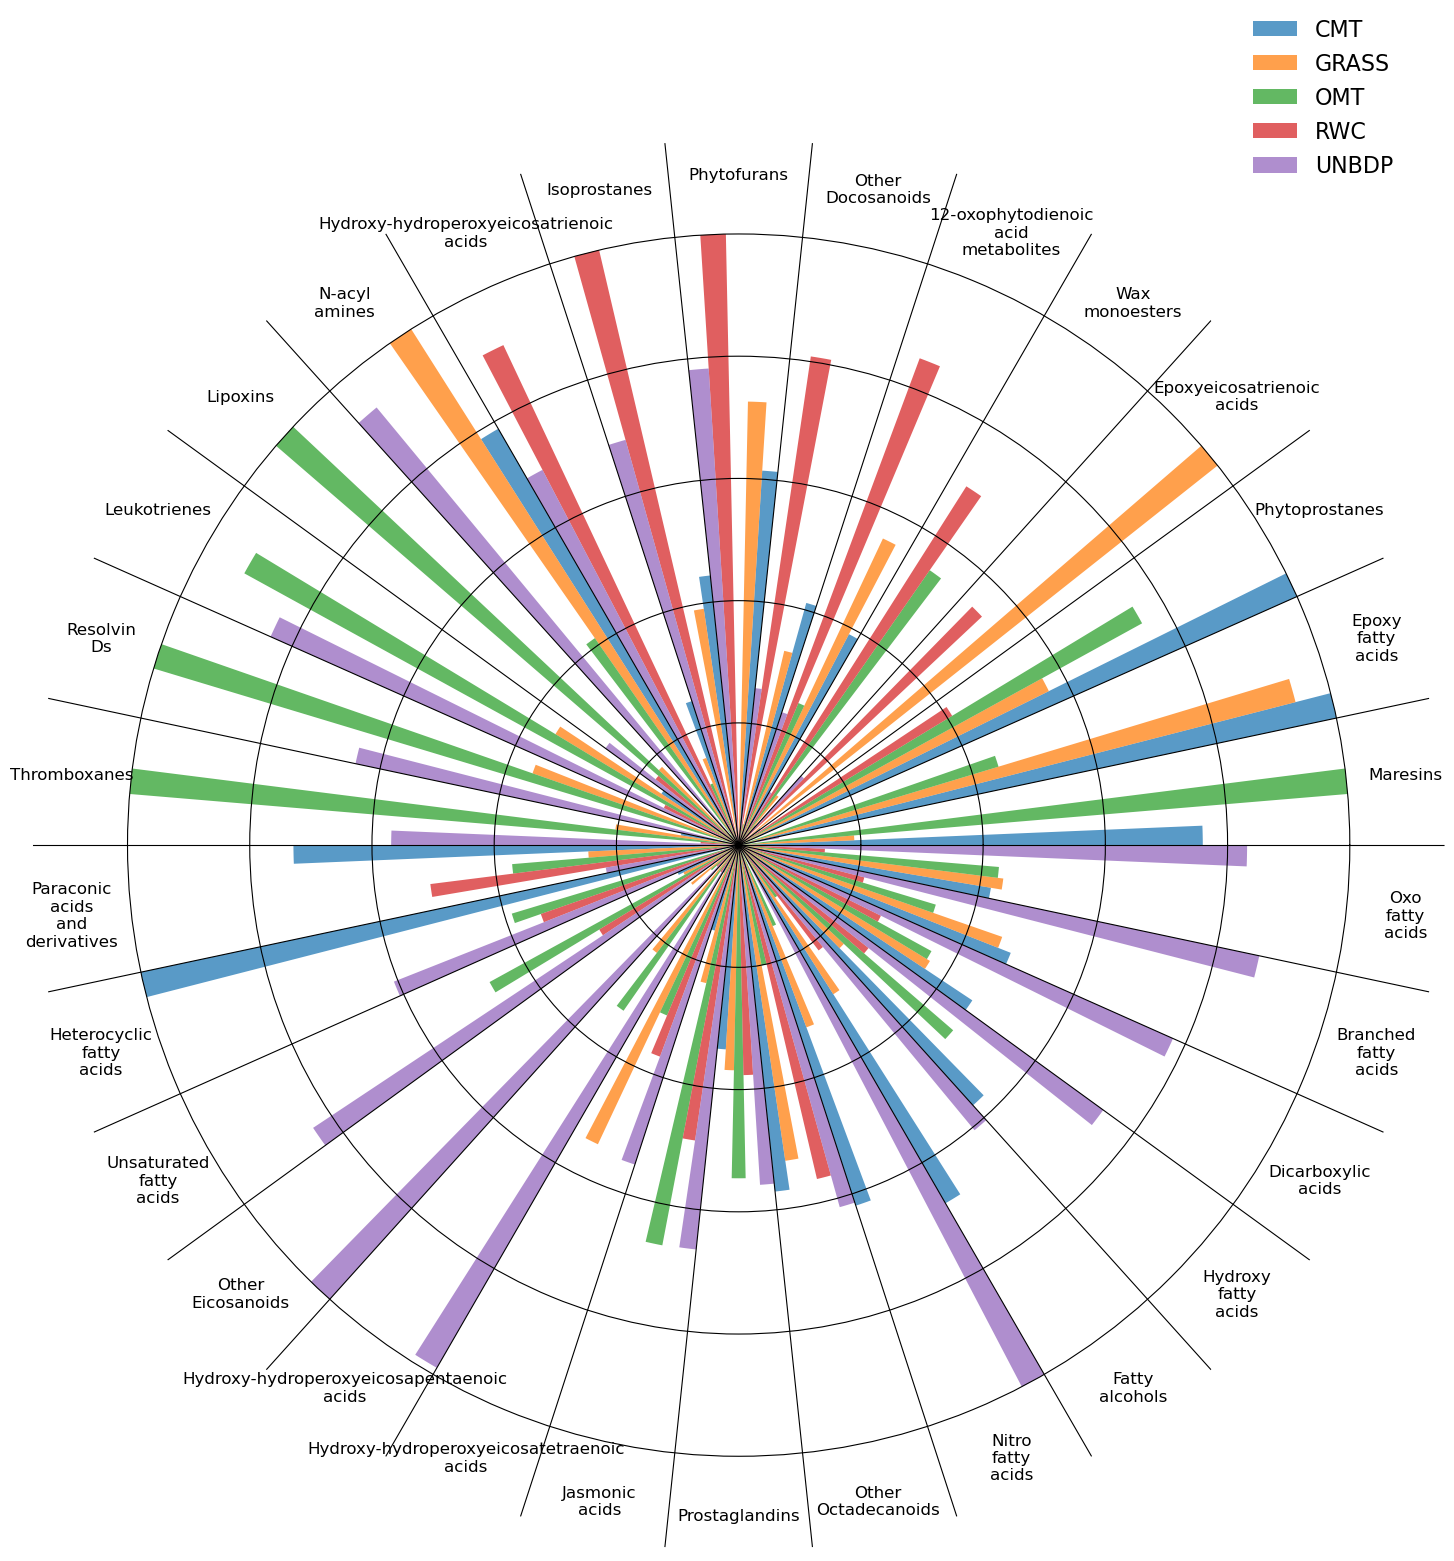

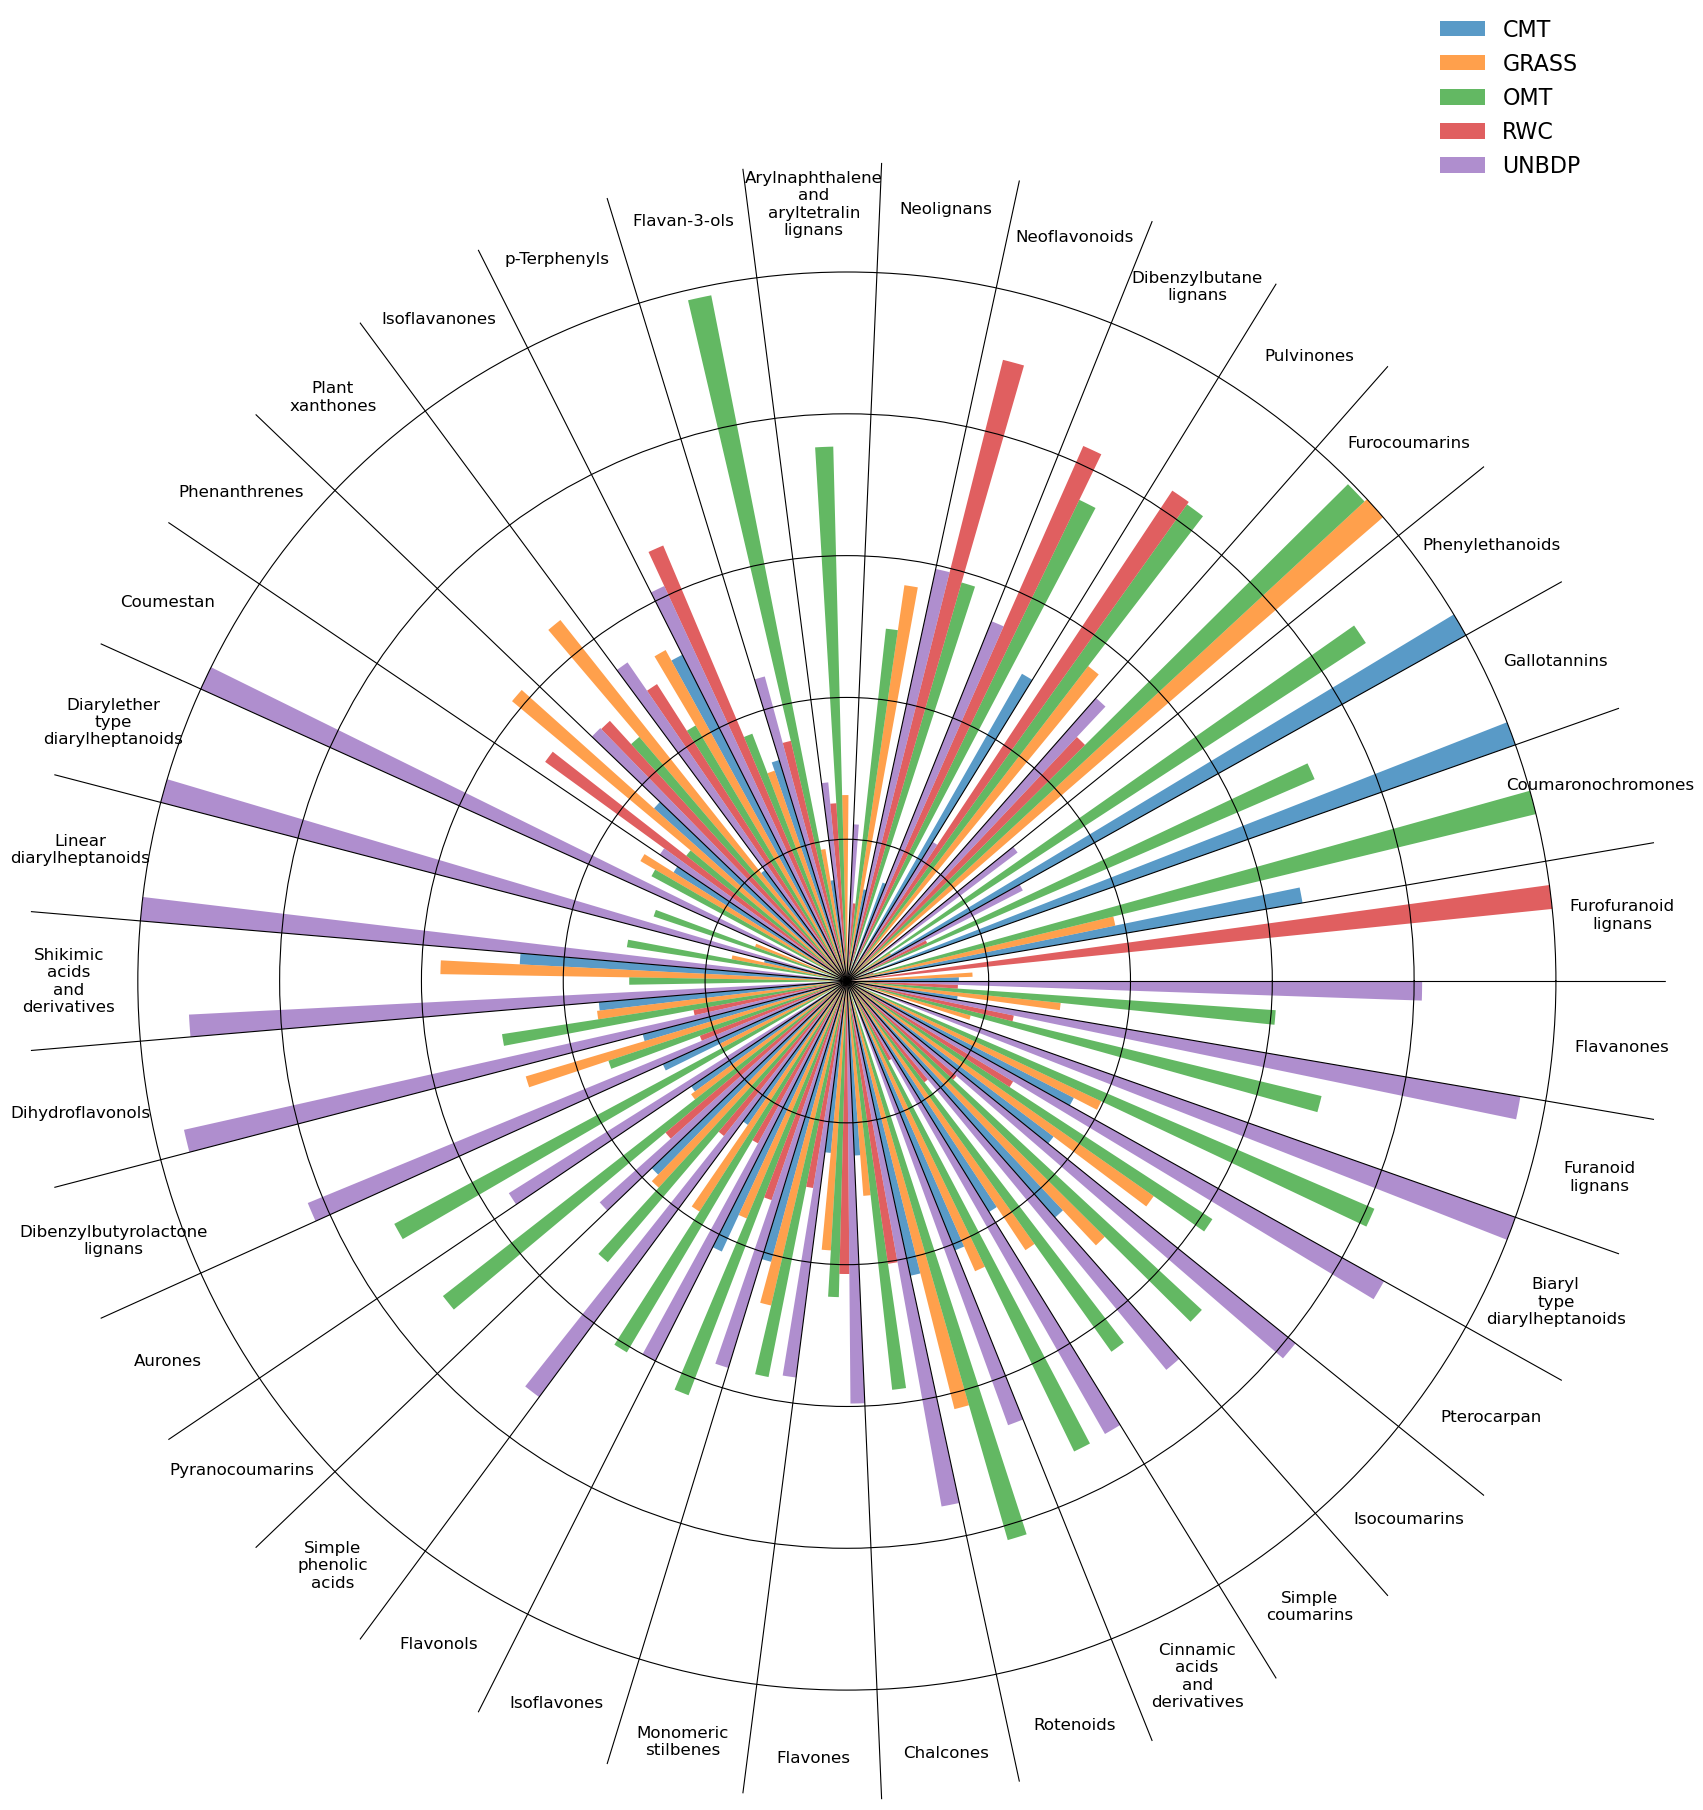

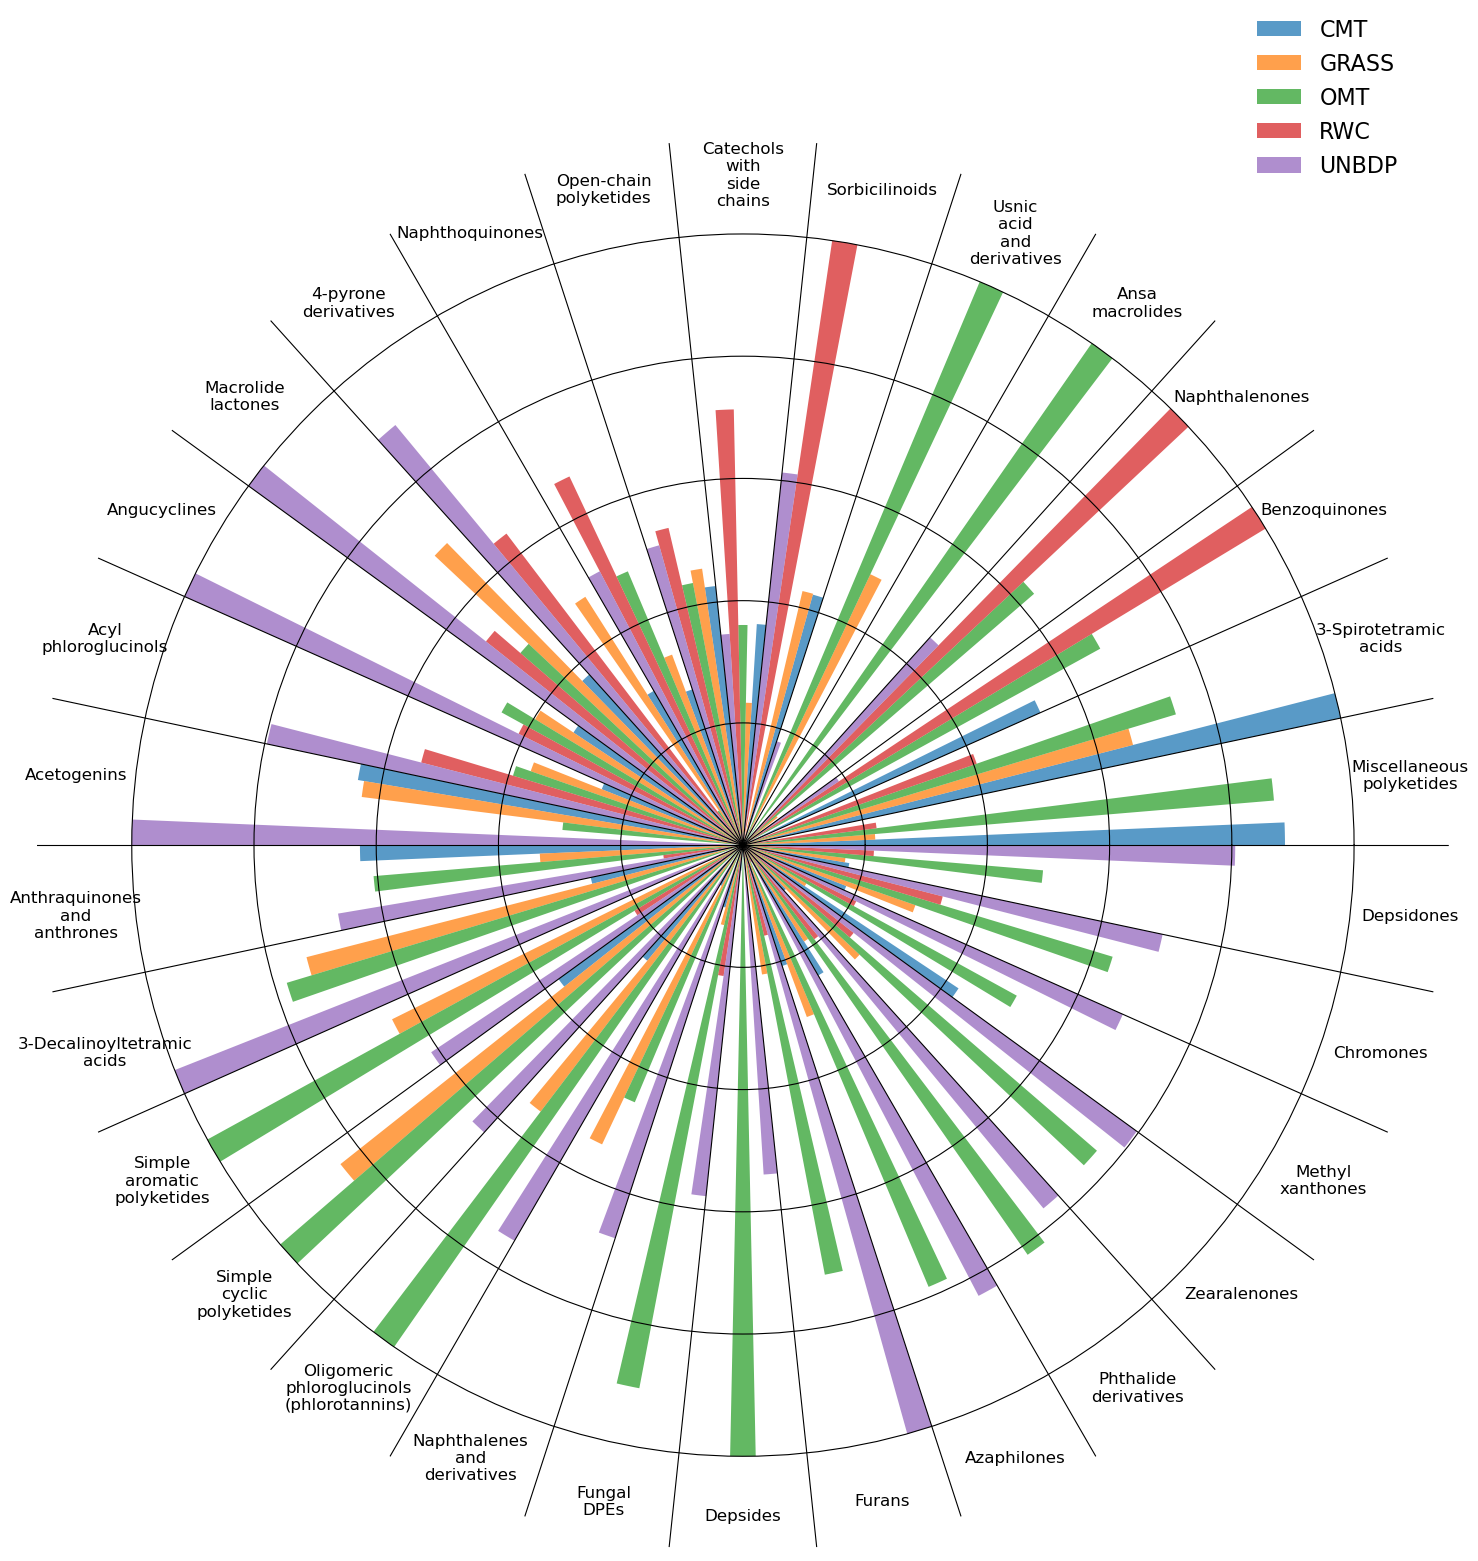

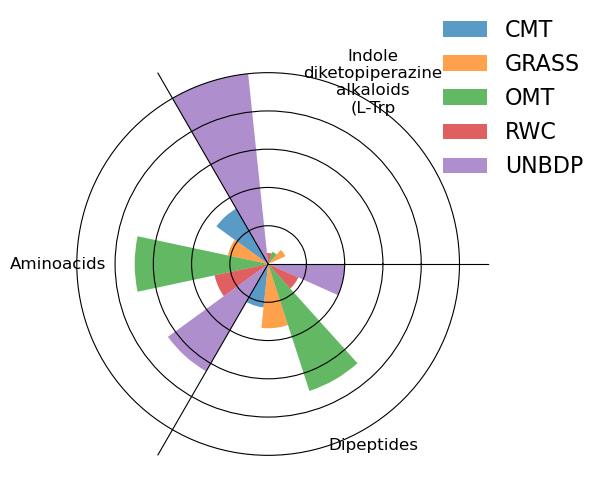

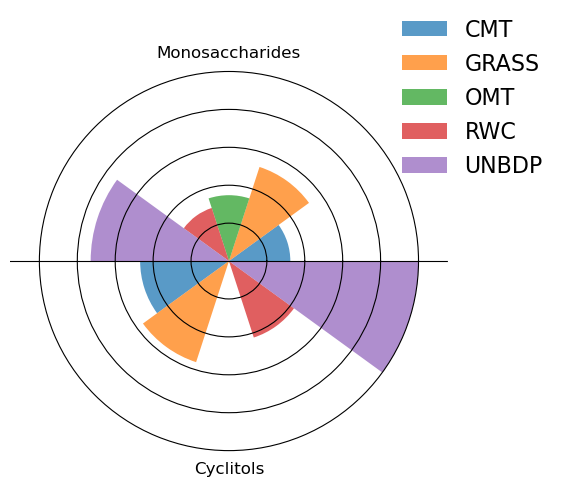

In [83]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from rdkit import Chem
from rdkit.Chem import Draw
from scipy.cluster.hierarchy import linkage, dendrogram
# Create the polar plot

def order_similar_rows(cluster_df):
    # Calculate the pairwise distances between rows
    # cols = [c for c in cluster_df.columns]# if ('deciduousforests' in c) | ('coniferousforests' in c)]
    distances = cluster_df.values

    # Perform hierarchical clustering
    Z = linkage(distances, method='average', metric='euclidean')

    # Get the order of the rows based on the clustering
    order = dendrogram(Z, no_plot=True)['leaves']

    # Reorder the rows of cluster_df
    cluster_df = cluster_df.iloc[order]

    # Show the reordered cluster_df
    return cluster_df#[cols]

def make_polar_structural_cluster_plot(cluster_df):
    cluster_df = order_similar_rows(cluster_df)
    s = cluster_df.shape[0]/20*7 + 5
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(s, s), subplot_kw={'projection': 'polar'})

    # Define the angles for each side of the polygons
    angles = np.linspace(0, 2 * np.pi, cluster_df.shape[0] + 1)[:-1]
    shift_amount = np.diff(angles)[0] / cluster_df.shape[1]
    for iii in range(cluster_df.shape[1]):
        # Define the lengths of the bars
        bar_lengths = cluster_df.values[:, iii]
        # Plot the bars
        ax.bar(angles + iii * shift_amount, bar_lengths*1, width=shift_amount, align='edge', alpha=0.74, label=cluster_df.columns[iii].replace('Quant: ',''))

    # Set the labels for each side of the polygons
    ax.set_xticks(angles)
    ax.set_xticklabels(['' for i in range(cluster_df.shape[0])])

    # Set the title of the plot
    tick_labels = ax.xaxis.get_ticklabels()

    m = ax.get_ylim()[1]*1.1
    ax.set_ylim(0, m)



    counter = 0
    for i, row in cluster_df.iterrows():
        my_angle = angles[counter] + shift_amount* cluster_df.shape[1]/2
        # my_angle = angles[counter] + shift_amount*2
        # my_angle = my_angle * 180/np.pi - 90
        # my_angle = my_angle * 180/np.pi
        my_angle = 0
        # ax.text(angles[counter] + shift_amount*cluster_df.shape[1]/2, m * 1.11, '%s'%i, ha='center', va='center', fontsize=12, rotation=my_angle)#angles[counter]*180/4/np.pi)
        my_text = '%s'%i
        my_text = my_text.replace(' ','\n')
        ax.text(angles[counter] + shift_amount*cluster_df.shape[1]/2, m * 0.95, my_text, ha='center', va='center', fontsize=12, rotation=my_angle)#angles[counter]*180/4/np.pi)


        counter += 1

    ax.spines['polar'].set_visible(False)
    ax.grid(color='black')
    # Hide the y tick labels
    ax.set_yticklabels([])

    # Position the legend outside of the plot area
    ax.legend(bbox_to_anchor=(0.85, 1.1), loc='upper left',fontsize=16,frameon=False)

    plt.tight_layout()


unique_values = cluster_df.index.get_level_values('np_classifier_pathway').unique()
# unique_values = [u for u in unique_values is u!=None]
for uv in unique_values:
    selected_rows = cluster_df.loc[cluster_df.index.get_level_values('np_classifier_pathway') == uv]
    selected_rows.reset_index(drop=True, level="np_classifier_pathway", inplace=True)
    make_polar_structural_cluster_plot(selected_rows)
    # plt.savefig('../data/structural_clusters_%s.png'%uv)
    # plt.close()


In [47]:
unique_values

NameError: name 'unique_values' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of sides of the polygons
num_sides = bar_df.shape[0]

# Define the angles for each side of the polygons
angles = np.linspace(0, 2 * np.pi, num_sides + 1)[:-1]



# Create the polar plot
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(12,12),subplot_kw={'projection': 'polar'})
ax = ax.flatten()

for i in range(len(ax)):
    # Define the lengths of the bars
    bar_lengths = bar_df.values[:,i]
    # Plot the bars
    ax[i].bar(angles, bar_lengths, width=0.1, align='edge', color='blue', alpha=0.5)


    # Set the labels for each side of the polygons
    ax[i].set_xticks(angles)
    ax[i].set_xticklabels(['Side {}'.format(i+1) for i in range(num_sides)])

    # Set the title of the plot
    ax[i].set_title(bar_df.columns[i])

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']
values = [10, 15, 7, 12, 9]

# Convert values to radians
theta = np.linspace(0.0, 2 * np.pi, len(categories), endpoint=False)

# Create polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
bars = ax.bar(theta, values)

# Set the color of each bar
for bar in bars:
    bar.set_facecolor(np.random.rand(3))

# Set the labels for each category
ax.set_xticks(theta)
ax.set_xticklabels(categories)

# Set the title of the plot
ax.set_title('Circular Barchart')

# Show the plot
plt.show()
